# Load in and inspect data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


ride_bookings_df = pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')


In [2]:
ride_bookings_df.shape

(150000, 21)

In [3]:
ride_bookings_df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [4]:
ride_bookings_df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# Data distribution

In [5]:
print(f"Customer cancellation reasons\n {ride_bookings_df['Reason for cancelling by Customer'].unique()}\n")
print(f"Driver cancellation reasons\n {ride_bookings_df['Driver Cancellation Reason'].unique()}\n")
print(f"Incomplete ride reasons\n {ride_bookings_df['Incomplete Rides Reason'].unique()}\n")



print(f"Booking statuses\n {ride_bookings_df['Booking Status'].unique()}\n")


Customer cancellation reasons
 [nan 'Driver is not moving towards pickup location'
 'Driver asked to cancel' 'AC is not working' 'Change of plans'
 'Wrong Address']

Driver cancellation reasons
 [nan 'Personal & Car related issues' 'Customer related issue'
 'More than permitted people in there' 'The customer was coughing/sick']

Incomplete ride reasons
 [nan 'Vehicle Breakdown' 'Other Issue' 'Customer Demand']

Booking statuses
 ['No Driver Found' 'Incomplete' 'Completed' 'Cancelled by Driver'
 'Cancelled by Customer']



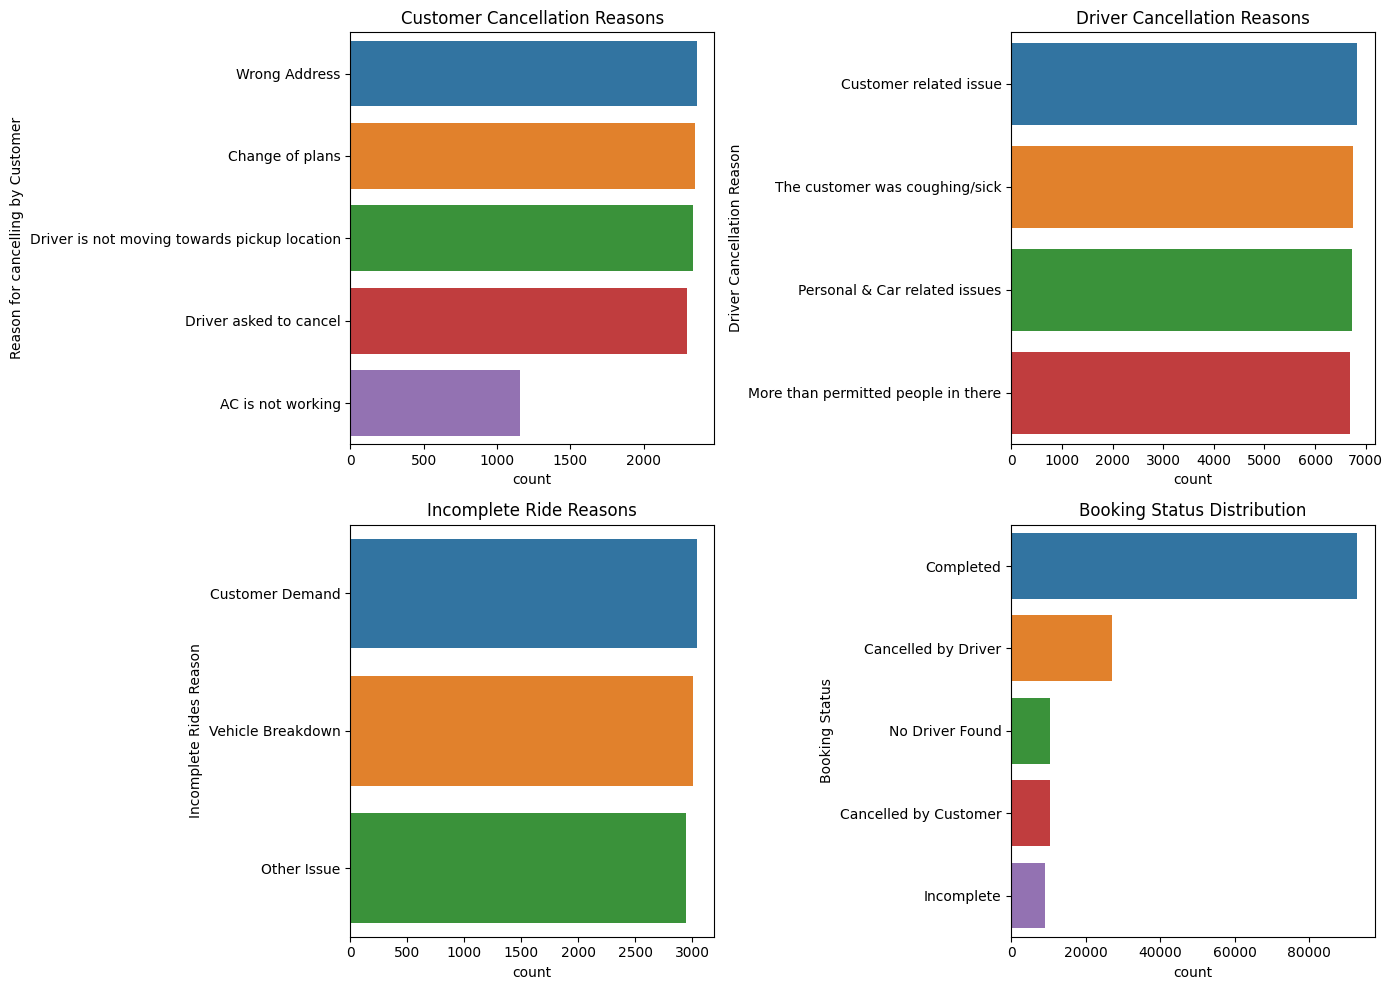

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.countplot(data=ride_bookings_df, y="Reason for cancelling by Customer", order=ride_bookings_df["Reason for cancelling by Customer"].value_counts().index, ax=axes[0,0])
axes[0,0].set_title("Customer Cancellation Reasons")

sns.countplot(data=ride_bookings_df, y="Driver Cancellation Reason", order=ride_bookings_df["Driver Cancellation Reason"].value_counts().index, ax=axes[0,1])
axes[0,1].set_title("Driver Cancellation Reasons")

sns.countplot(data=ride_bookings_df, y="Incomplete Rides Reason", order=ride_bookings_df["Incomplete Rides Reason"].value_counts().index, ax=axes[1,0])
axes[1,0].set_title("Incomplete Ride Reasons")

sns.countplot(data=ride_bookings_df, y="Booking Status", order=ride_bookings_df["Booking Status"].value_counts().index, ax=axes[1,1])
axes[1,1].set_title("Booking Status Distribution")

plt.tight_layout()
plt.show()

# Predictive models